In [1]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
import proplot as plot

/home/mballarotta/.conda/envs/my_conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


In [32]:
plot.rc['savefig.transparent']=False

In [2]:
ds_timeseries_duacs = xr.open_dataset('stat_timeseries_OSE_GULFSTREAM_DUACS_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_timeseries_miost = xr.open_dataset('stat_timeseries_OSE_GULFSTREAM_MIOST_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_timeseries_dymost_static = xr.open_dataset('stat_timeseries_OSE_GULFSTREAM_DYMOST_STATIC_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_timeseries_dymost_dynamic = xr.open_dataset('stat_timeseries_OSE_GULFSTREAM_DYMOST_DYNAMIC_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_timeseries_fpgenn = xr.open_dataset('stat_timeseries_OSE_GULFSTREAM_FP-GENN_2017-01-01-2017-12-31_c2_vxxc.nc')
ds_timeseries_bfn = xr.open_dataset('stat_timeseries_OSE_GULFSTREAM_BFN_2017-01-01-2017-12-31_c2_vxxc.nc')

In [45]:
mean_duacs = ds_timeseries_duacs['rms'].mean().values
std_duacs = ds_timeseries_duacs['rms'].std().values
print(f'DUACS: MEAN RMSE is {mean_duacs}m ± {std_duacs}m')

mean_miost = ds_timeseries_miost['rms'].mean().values
std_miost = ds_timeseries_miost['rms'].std().values
print(f'MIOST: MEAN RMSE is {mean_miost}m ± {std_miost}m')

mean_dymost_static = ds_timeseries_dymost_static['rms'].mean().values
std_dymost_static = ds_timeseries_dymost_static['rms'].std().values
print(f'DYMOST (STATIC): MEAN RMSE is {mean_dymost_static}m ± {std_dymost_static}m')

mean_dymost_dyn = ds_timeseries_dymost_dynamic['rms'].mean().values
std_dymost_dyn = ds_timeseries_dymost_dynamic['rms'].std().values
print(f'DYMOST (DYNAMIC):MEAN RMSE is {mean_dymost_dyn}m ± {std_dymost_dyn}m')

mean_fpgenn = ds_timeseries_fpgenn['rms'].mean().values
std_fpgenn = ds_timeseries_fpgenn['rms'].std().values
print(f'FP-GENN: MEAN RMSE is {mean_fpgenn}m ± {std_fpgenn}m')


mean_bfn = ds_timeseries_bfn['rms'].mean().values
std_bfn = ds_timeseries_bfn['rms'].std().values
print(f'BFN: MEAN RMSE is {mean_bfn}m ± {std_bfn}m')

DUACS: MEAN RMSE is 0.07002945144968127m ± 0.022538597169692417m
MIOST: MEAN RMSE is 0.06735610701836871m ± 0.02280886039605539m
DYMOST (STATIC): MEAN RMSE is 0.07042162571449842m ± 0.023417955194676262m
DYMOST (DYNAMIC):MEAN RMSE is 0.0627375853309214m ± 0.017134727226796462m
FP-GENN: MEAN RMSE is 0.07600381285533764m ± 0.024330463431666387m
BFN: MEAN RMSE is 0.07097644493260995m ± 0.02417348091212038m


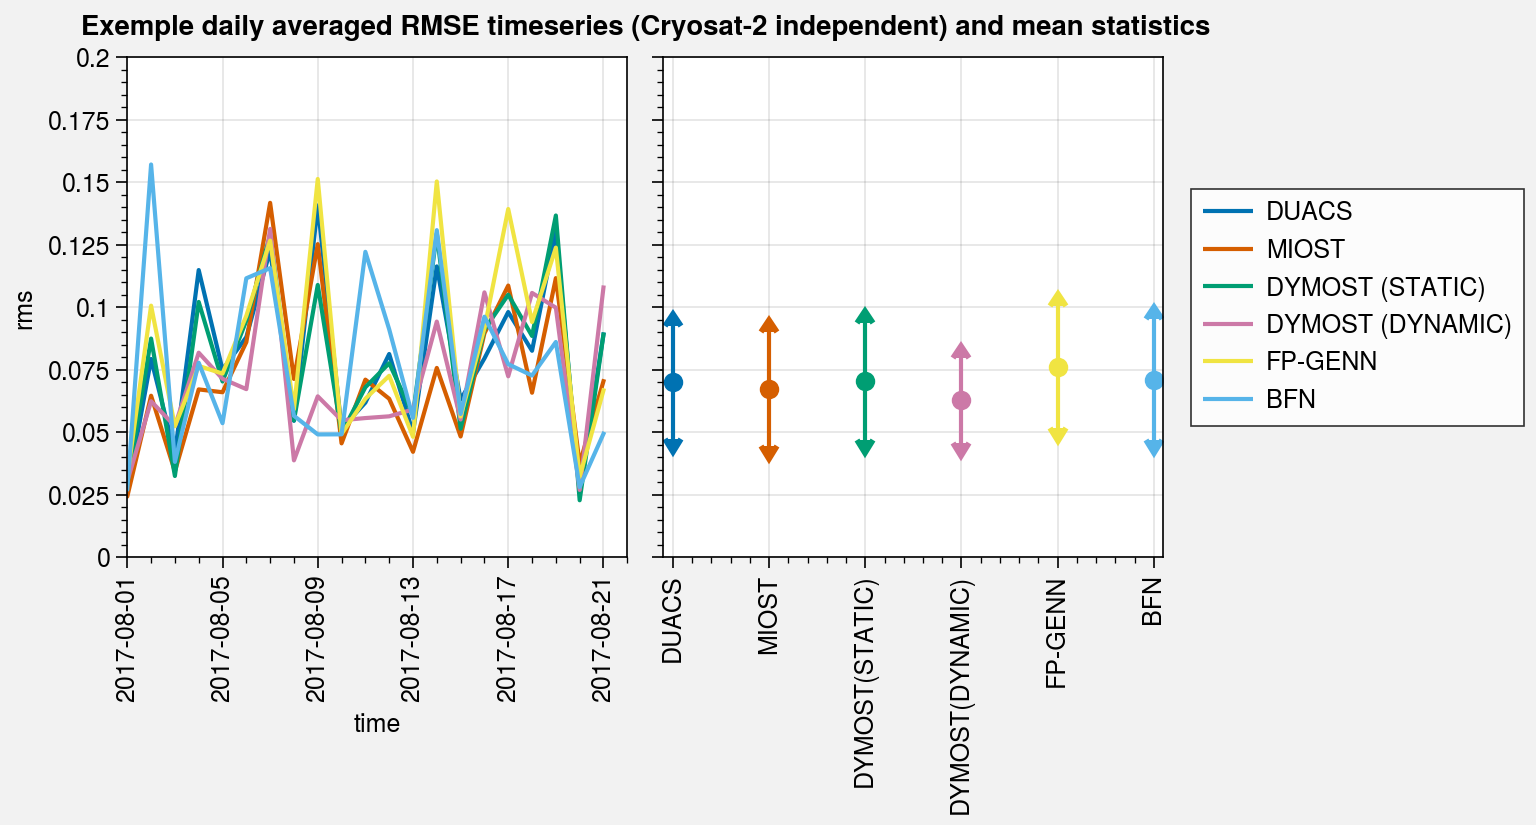

In [74]:
fig, axs = plot.subplots(ncols=2, span=False,)

axs.format(suptitle='Exemple daily averaged RMSE timeseries (Cryosat-2 independent) and mean statistics')
axs[0].format(xlim=(np.datetime64('2017-08-01'), np.datetime64('2017-08-22')), 
          ylim=(0, 0.2))
p1 = axs[0].plot(ds_timeseries_duacs['time'], ds_timeseries_duacs['rms'], label='DUACS')
p2 = axs[0].plot(ds_timeseries_miost['time'], ds_timeseries_miost['rms'], label='MIOST')
p3 = axs[0].plot(ds_timeseries_dymost_static['time'], ds_timeseries_dymost_static['rms'], label='DYMOST (STATIC)')
p4 = axs[0].plot(ds_timeseries_dymost_dynamic['time'], ds_timeseries_dymost_dynamic['rms'], label='DYMOST (DYNAMIC)')
p5 = axs[0].plot(ds_timeseries_fpgenn['time'], ds_timeseries_fpgenn['rms'], label='FP-GENN')
p6 = axs[0].plot(ds_timeseries_bfn['time'], ds_timeseries_bfn['rms'], label='BFN')


axs[1].format(xlim=(0.9, 6.1), xlocator=1, xrotation=90, xticklabels=['DUACS', 'MIOST', 'DYMOST(STATIC)', 'DYMOST(DYNAMIC)', 'FP-GENN', 'BFN'])
axs[1].errorbar(1,mean_duacs, std_duacs, capthick=2, fmt='o', uplims=True, lolims=True)
axs[1].errorbar(2,mean_miost, std_miost, capthick=2, fmt='o', uplims=True, lolims=True)
axs[1].errorbar(3,mean_dymost_static, std_dymost_static, capthick=2, fmt='o', uplims=True, lolims=True)
axs[1].errorbar(4,mean_dymost_dyn, std_dymost_dyn, capthick=2, fmt='o', uplims=True, lolims=True)
axs[1].errorbar(5,mean_fpgenn, std_fpgenn, capthick=2, fmt='o', uplims=True, lolims=True)
axs[1].errorbar(6,mean_bfn, std_bfn, capthick=2, fmt='o', uplims=True, lolims=True)

fig.legend([p1, p2, p3, p4, p5, p6], ncols=1, loc='r')
plt.savefig('Timeseries_RMSE_OSE.png')



In [4]:
ds_duacs = xr.open_dataset('stat_OSE_GULFSTREAM_DUACS_2017-01-01-2017-12-31_c2_vxxc.nc', group='diff')
ds_miost = xr.open_dataset('stat_OSE_GULFSTREAM_MIOST_2017-01-01-2017-12-31_c2_vxxc.nc', group='diff')
ds_dymost_static = xr.open_dataset('stat_OSE_GULFSTREAM_DYMOST_STATIC_2017-01-01-2017-12-31_c2_vxxc.nc', group='diff')
ds_dymost_dynamic = xr.open_dataset('stat_OSE_GULFSTREAM_DYMOST_DYNAMIC_2017-01-01-2017-12-31_c2_vxxc.nc', group='diff')
ds_fpgenn = xr.open_dataset('stat_OSE_GULFSTREAM_FP-GENN_2017-01-01-2017-12-31_c2_vxxc.nc', group='diff')
ds_bfn = xr.open_dataset('stat_OSE_GULFSTREAM_BFN_2017-01-01-2017-12-31_c2_vxxc.nc', group='diff')

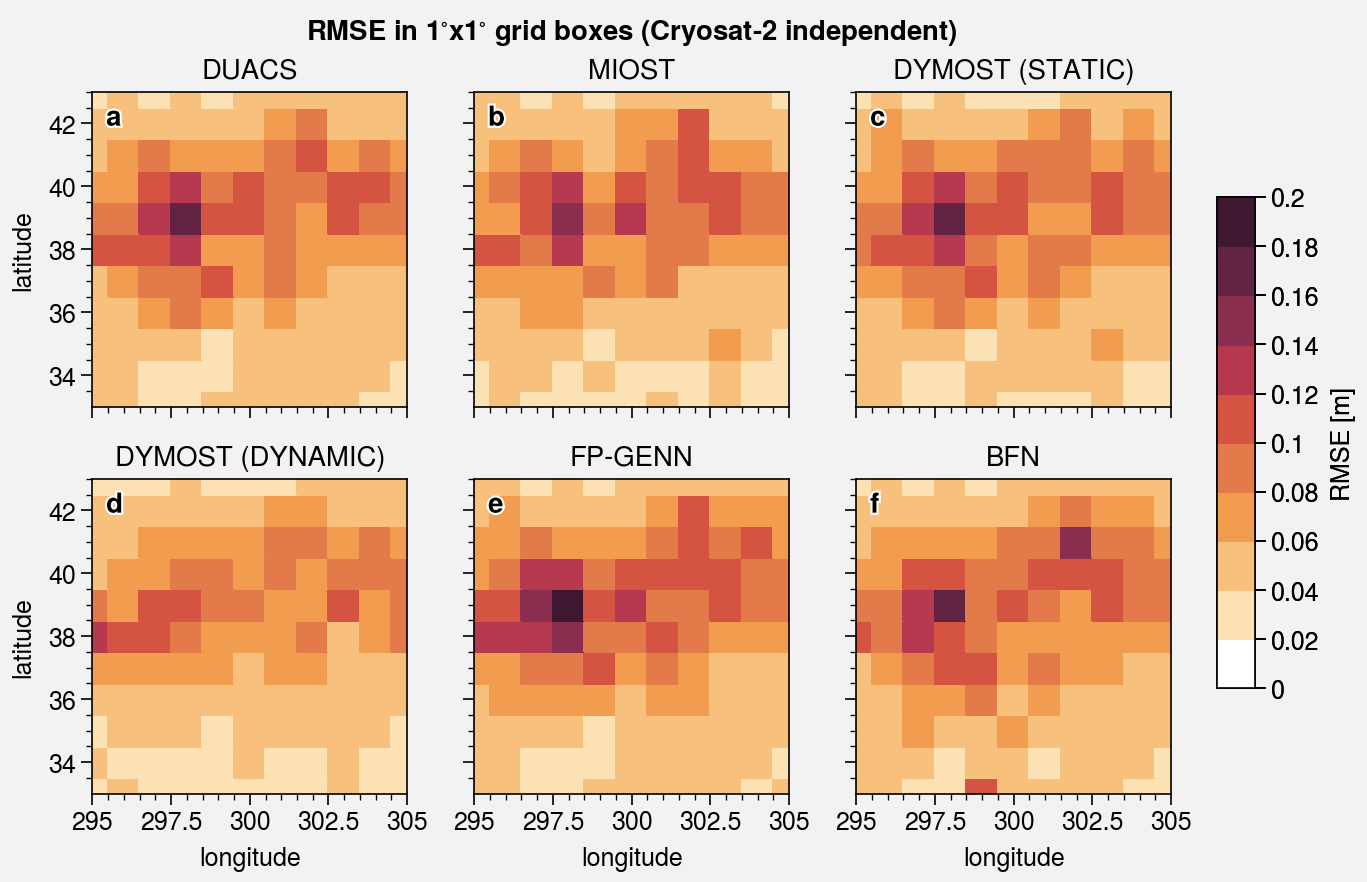

In [33]:
fig, ax = plot.subplots(ncols=3, nrows=2, span=False, axwidth='4cm')
ax.format(xlabel='longitude', ylabel='latitude', grid=False, suptitle='RMSE in 1$^{\circ}$x1$^{\circ}$ grid boxes (Cryosat-2 independent)', abc=True, abcloc='ul', xlim=(295, 305), ylim=(33, 43))

ax[0].pcolormesh(ds_duacs['lon'].values, ds_duacs['lat'].values, ds_duacs['rmse'], vmin=0, vmax=0.2)
ax[0].format(title='DUACS')
ax[1].pcolormesh(ds_miost['lon'].values, ds_miost['lat'].values, ds_miost['rmse'], vmin=0, vmax=0.2)
ax[1].format(title='MIOST')
ax[2].pcolormesh(ds_dymost_static['lon'].values, ds_dymost_static['lat'].values, ds_dymost_static['rmse'], vmin=0, vmax=0.2)
ax[2].format(title='DYMOST (STATIC)')
ax[3].pcolormesh(ds_dymost_dynamic['lon'].values, ds_dymost_dynamic['lat'].values, ds_dymost_dynamic['rmse'], vmin=0, vmax=0.2)
ax[3].format(title='DYMOST (DYNAMIC)')
ax[4].pcolormesh(ds_fpgenn['lon'].values, ds_fpgenn['lat'].values, ds_fpgenn['rmse'], vmin=0, vmax=0.2)
ax[4].format(title='FP-GENN')
pc = ax[5].pcolormesh(ds_bfn['lon'].values, ds_bfn['lat'].values, ds_bfn['rmse'], vmin=0, vmax=0.2)
ax[5].format(title='BFN')

cbar = fig.colorbar(pc, label='RMSE [m]', ticks=0.02, loc='r', length=0.7, formatter='simple')
plt.savefig('RMSE_OSE.png')

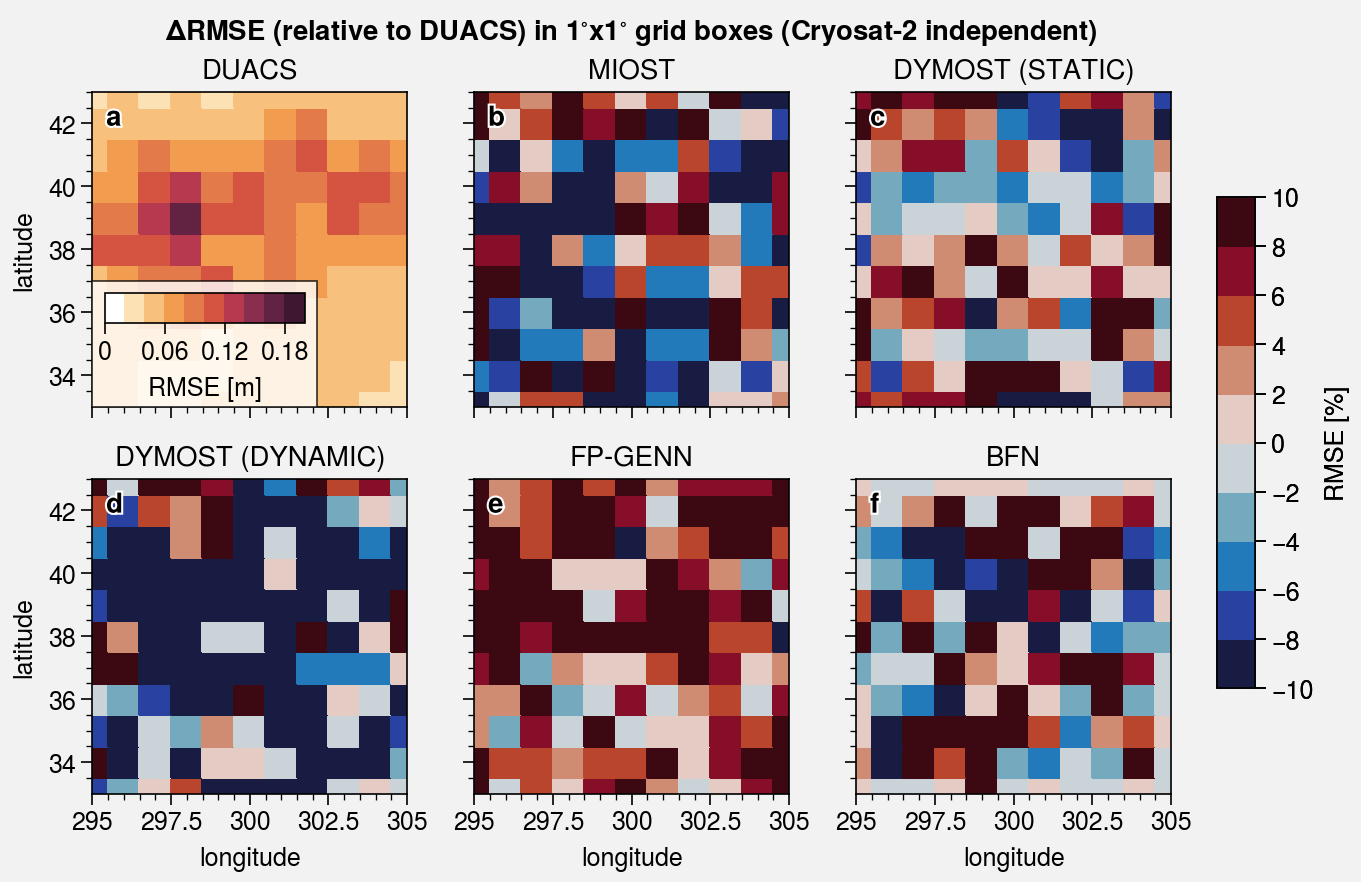

In [34]:
fig, ax = plot.subplots(ncols=3, nrows=2, span=False, axwidth='4cm')
ax.format(xlabel='longitude', ylabel='latitude', grid=False, suptitle='$\Delta RMSE$ (relative to DUACS) in 1$^{\circ}$x1$^{\circ}$ grid boxes (Cryosat-2 independent)', abc=True, abcloc='ul', xlim=(295, 305), ylim=(33, 43))

d = ax[0].pcolormesh(ds_duacs['lon'].values, ds_duacs['lat'].values, ds_duacs['rmse'], vmin=0, vmax=0.2)
ax[0].format(title='DUACS')
ax[0].colorbar(d, loc='ll', label='RMSE [m]')
ax[1].pcolormesh(ds_miost['lon'].values, ds_miost['lat'].values, 100*(ds_miost['rmse']-ds_duacs['rmse'])/ds_duacs['rmse'], vmin=-10, vmax=10, cmap='Balance')
ax[1].format(title='MIOST')
ax[2].pcolormesh(ds_dymost_static['lon'].values, ds_dymost_static['lat'].values,  100*(ds_dymost_static['rmse']-ds_duacs['rmse'])/ds_duacs['rmse'], vmin=-10, vmax=10, cmap='Balance')
ax[2].format(title='DYMOST (STATIC)')
ax[3].pcolormesh(ds_dymost_dynamic['lon'].values, ds_dymost_dynamic['lat'].values,  100*(ds_dymost_dynamic['rmse']-ds_duacs['rmse'])/ds_duacs['rmse'], vmin=-10, vmax=10, cmap='Balance')
ax[3].format(title='DYMOST (DYNAMIC)')
ax[4].pcolormesh(ds_fpgenn['lon'].values, ds_fpgenn['lat'].values,  100*(ds_fpgenn['rmse']-ds_duacs['rmse'])/ds_duacs['rmse'], vmin=-10, vmax=10, cmap='Balance')
ax[4].format(title='FP-GENN')
pc = ax[5].pcolormesh(ds_bfn['lon'].values, ds_bfn['lat'].values,  100*(ds_bfn['rmse']-ds_duacs['rmse'])/ds_duacs['rmse'], vmin=-10, vmax=10, cmap='Balance')
ax[5].format(title='BFN')

cbar = fig.colorbar(pc, label='RMSE [%]', ticks=2, loc='r', length=0.7, formatter='simple')
plt.savefig('Delta_RMSE_OSE.png')